In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import  image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import os,warnings, random,shutil
warnings.filterwarnings('ignore')
import codecs
codecs.register_error("strict",codecs.ignore_errors)
from tensorflow.keras.applications import ResNet50,EfficientNetB3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importing packages needed for image classifcation

This project aims to leverage deep learning for automatic garbage classification, sorting waste into ten distinct categories: **Metal, Glass, Biological Waste, Paper, Battery Waste, General Trash, Cardboard, Shoes, Clothes, and Plastic**. The objective is to develop a reliable image classification model capable of identifying waste items based on their visual characteristics. This system can enhance waste management efficiency and encourage more effective recycling practices.

1. Importing Required Libraries  
2. Dataset Loading  
3. Image Visualization  
4. Preprocessing Images  
5. Model Development  
   - **EfficientNetB3**  
   - **5.1 EfficientNetB3: Compilation & Training**  
6. ResNet50 Model  
   - **6.1 ResNet50: Compilation & Training**  
7. Convolutional Neural Network (CNN)  
   - **7.1 CNN: Compilation & Training**  
8. Model Performance Comparison (Accuracy & Loss)  
9. Making Predictions  
10. Predicting the First Class  
11. Conclusion & Acknowledgment

In [ ]:
#loading of the dataset
data_path= data_path = "/content/drive/MyDrive/archive (9)/garbage-dataset"
classes_names=os.listdir(data_path)
classes_names

['plastic',
 'glass',
 'shoes',
 'clothes',
 'biological',
 'trash',
 'battery',
 'cardboard',
 'metal',
 'paper']

In [ ]:
out_dir='/colab/working/'

train_dir=os.path.join(out_dir,'train')
valid_dir=os.path.join(out_dir,'valid')
test_dir=os.path.join(out_dir,'test')

for folder in [train_dir, valid_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)

In [ ]:
# Train-Validation-Test Split Ratios
train_ratio = 0.7  # 70% Training
valid_ratio = 0.15  # 15% Validation
test_ratio = 0.15   # 15% Testing

# Iterate over each class in the dataset
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)

    if not os.path.isdir(class_path):
        continue  # Skip non-directory files

    # Get all image file names
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png',))]

    # Shuffle images
    random.shuffle(image_files)

    # Split images into train, validation, and test sets
    train_imgs, temp_imgs = train_test_split(image_files, test_size=(1 - train_ratio), random_state=42)
    valid_imgs, test_imgs = train_test_split(temp_imgs, test_size=(test_ratio / (test_ratio + valid_ratio)), random_state=42)

    # Create class directories in train, valid, and test folders
    for folder in [train_dir, valid_dir, test_dir]:
        os.makedirs(os.path.join(folder, class_name), exist_ok=True)

    # Move images to corresponding folders
    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in valid_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(valid_dir, class_name, img))

    for img in test_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

IMAGE VISUALZATION IN A RANDOM STATE

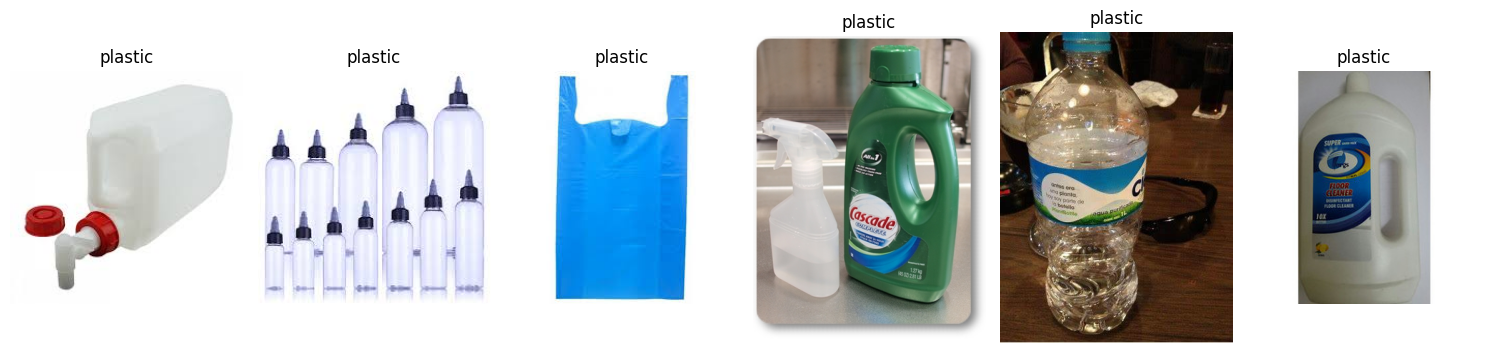

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image


# Get list of classes (folders in dataset)
classes = [cls for cls in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, cls))]

# Set number of images to display
num_images = 6

# Randomly pick a class
selected_class = random.choice(classes)
class_path = os.path.join(data_path, selected_class)

# Get list of images in the selected class
image_files = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))]

# Randomly select images
selected_images = random.sample(image_files, min(num_images, len(image_files)))

# Plot the images
fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))

for ax, img_name in zip(axes, selected_images):
    img_path = os.path.join(class_path, img_name)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(selected_class)
    ax.axis("off")

plt.tight_layout()
plt.show()
